<a href="https://colab.research.google.com/github/Ayush98n/walmart/blob/main/Yulu_Hypothesis_Ayush_Krishan_Negi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as m
from scipy.stats import norm, binom, expon # normal distribution

!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089 -O yulu_data.csv
yulu_data = pd.read_csv('yulu_data.csv')

--2025-07-18 18:46:10--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.10, 108.157.172.176, 108.157.172.173, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘yulu_data.csv’

yulu_data.csv       100%[===================>] 633.16K  --.-KB/s    in 0.07s   

2025-07-18 18:46:10 (9.23 MB/s) - ‘yulu_data.csv’ saved [648353/648353]



In [115]:
df_yulu= pd.read_csv("yulu_data.csv")
df_yulu

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# **Exploratory Data Analysis.**

In [116]:
df_yulu.shape

(10886, 12)

In [117]:
df_yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**The Yulu dataset contains 12 columns and 10,886 rows with datatypes as follows: 3 float64, 8 int64, and 1 object.**

In [118]:
print("Null Values Check: \n")
print(df_yulu.isnull().sum())
print("\nDuplicate Values Check:",df_yulu[df_yulu.duplicated()].shape, end=" ")

Null Values Check: 

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Duplicate Values Check: (0, 12) 

**The above analysis shows that there are no null and duplicate values present in the Yulu dataset.**

# **Registered and Casual Users Count**

In [119]:
print("Total_Registered_Users:",df_yulu['registered'].sum())
print("Total_Casual_Users:",df_yulu['casual'].sum())
print("Total_Users:",df_yulu['count'].sum() )

Total_Registered_Users: 1693341
Total_Casual_Users: 392135
Total_Users: 2085476


**The above data shows the total rental bikes count: 20,85,476, where 16,93,341 are Registered Users and 3,92,135 are Casual Users.**

In [120]:
# Sample structure – replace with your actual column names
columns_to_sum = df_yulu[['casual', 'registered']]
columns_to_sum
# Calculate the sums
sums = columns_to_sum.sum()

# Create a DataFrame for plotting
sums_df = pd.DataFrame({'Category': sums.index, 'Total': sums.values})
sums_df

,Category,Total
0,casual,392135
1,registered,1693341


# **Bar Plot for Casual and Registered Users**

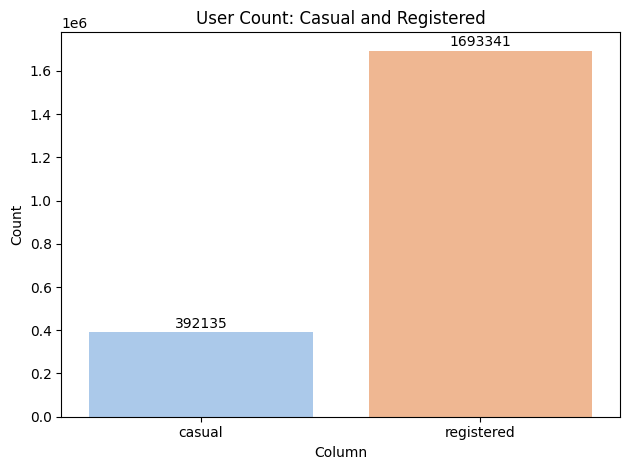

In [121]:
# Sample structure – replace with your actual column names
columns_to_sum = df_yulu[['casual', 'registered']]
columns_to_sum
# Calculate the sums
sums = columns_to_sum.sum()
# Create a DataFrame for plotting
sums_df = pd.DataFrame({'Category': sums.index, 'Total': sums.values})
# Plot the bar chart
ax= sns.barplot(data=sums_df, x='Category', y='Total', hue='Category', palette='pastel')
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge', padding=1)
#tickran= np.arange(100000, 2000000, 100000)
#plt.yticks(tickran)
plt.title("User Count: Casual and Registered")
plt.xlabel("Column")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [122]:
data = df_yulu['registered']
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
print(f"IQR = {iqr}")

IQR = 186.0


# **Splitting the datetime column into Date and Time**

In [123]:
from datetime import datetime, timedelta, date, time
df_yulu['datetime']= pd.to_datetime(df_yulu['datetime'])
df_yulu['date']= df_yulu['datetime'].dt.date
df_yulu['time']= df_yulu['datetime'].dt.time
df_yulu['year']= df_yulu['datetime'].dt.year
df_yulu['month']= df_yulu['datetime'].dt.month
df_yulu['day']= df_yulu['datetime'].dt.day

Now, the yulu dataset has 4 more columns: **Date**, **Time, Year, Month** for better readability.

In [124]:
df_year_month_desc = df_yulu[['year','month']].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)
df_year_month_asc = df_yulu[['year','month']].value_counts().reset_index(name='count').sort_values(by='count', ascending=True)
yr_mt= pd.concat([df_year_month_desc.reset_index(drop=True),df_year_month_asc.reset_index(drop= True)], axis=1)
yr_mt

,year,month,count,year,month,count
0,2011,8,456,2011,1,431
1,2011,7,456,2011,2,446
2,2011,6,456,2011,3,446
3,2011,5,456,2012,1,453
4,2012,9,456,2011,9,453
5,2012,10,456,2012,4,454
6,2011,11,456,2011,4,455
7,2011,12,456,2011,10,455
8,2012,12,456,2012,3,455
9,2012,7,456,2012,11,455


The data highlights Yulu bike usage across the years 2011 and 2012, sorted in descending/ascending order by month side by side. In 2011, peak usage by both registered and casual users was observed during the months of **May, June, July, August, November, and December**. Similarly, in 2012, maximum activity occurred in **May, June, July, August, September, October, and December**. In contrast, the first quarter—**January, February, and March**—recorded the lowest usage in both years.

In [125]:
df_month = df_yulu['month'].value_counts().reset_index().sort_values(by='count', ascending= False)
df_month

,month,count
0,8,912
1,7,912
2,6,912
3,5,912
4,12,912
5,10,911
6,11,911
7,4,909
8,9,909
9,2,901


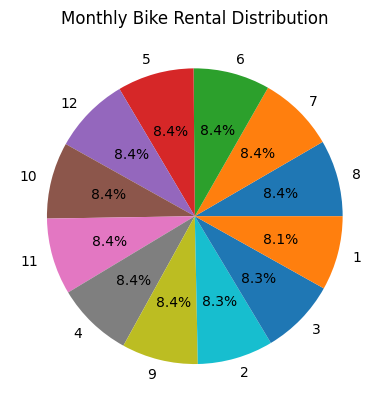

In [126]:
plt.pie(df_month['count'], labels=df_month['month'], autopct='%1.1f%%')
plt.title("Monthly Bike Rental Distribution")
plt.show()

Almost all months have same share of rented bikes.

In [127]:
df_date_month = df_yulu[['date','month']].value_counts().reset_index().sort_values(by=['date','month'], ascending= False)
df_date_month

,date,month,count
0,2012-12-19,12,24
2,2012-12-18,12,24
3,2012-12-17,12,24
4,2012-12-16,12,24
391,2012-12-15,12,24
...,...,...,...
417,2011-01-05,1,23
448,2011-01-04,1,23
454,2011-01-03,1,22
440,2011-01-02,1,23


<Axes: >

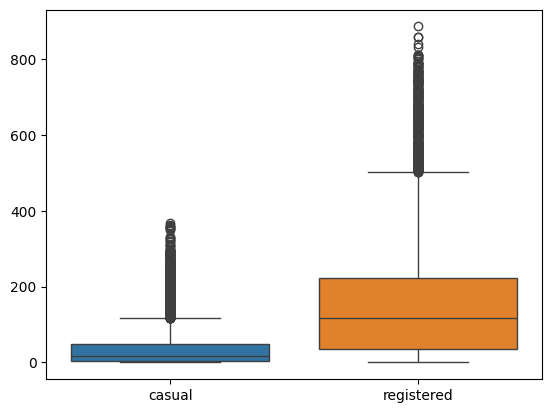

In [128]:
sns.boxplot(data= df_yulu[['casual','registered']])

IQR: 45.0
The minimum value to keep is: 4.0
The maximum value to keep is: 354.0


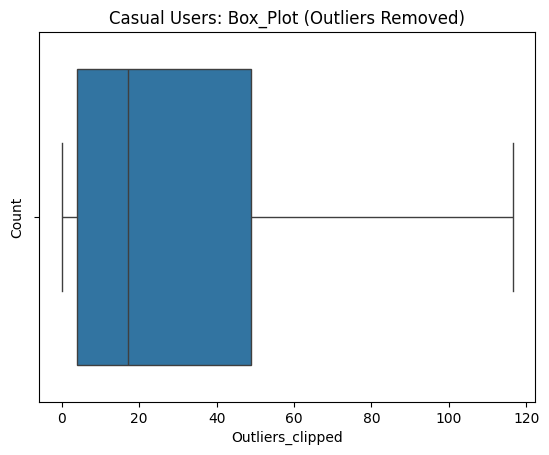

In [129]:
data = df_yulu['casual']
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = [x for x in data if x < lower_bound or x > upper_bound]
print("IQR:", iqr)
print("The minimum value to keep is:", lower)
print("The maximum value to keep is:", upper)

df_yulu['Outliers_clipped'] = np.clip(data,upper_bound, lower_bound)

sns.boxplot(data=df_yulu, x= df_yulu['Outliers_clipped'])
plt.title("Casual Users: Box_Plot (Outliers Removed)")
plt.ylabel("Count") # Label for the y-axis
plt.show()


The IQR means the central 50% of casual rental counts fall within a spread of 45 units — from Q1 to Q3.
Suggests moderate variability in typical rental behavior.


Days with rentals below this threshold (4) were considered extreme and removed.
Indicates very low casual usage on some days (likely off-peak or weather-affected).

3. **Maximum value kept = 354.0**  
   - High-end rentals beyond this were treated as outliers.
   - Helps isolate typical rental patterns by trimming inflated peaks.

4. **Median rental count ≈ 20**  
   - Half of the casual usage days had fewer than ~20 rentals.
   - Shows that most casual user traffic is relatively low — possibly occasional riders or weekend users.

5. **Data Spread is Wide but Right-Skewed**  
   - Large gap between median (20) and upper bound (354) reveals a few high-volume rental days.
   - Typical of casual users who might spike during special events, good weather, or holidays.

IQR: 186.0
The minimum value to keep is: -243.0
The maximum value to keep is: 501.0


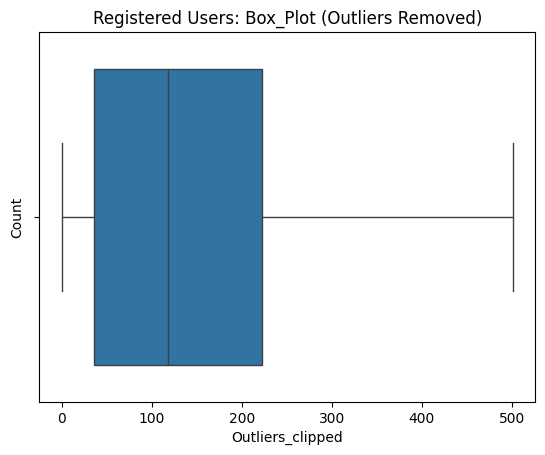

In [130]:
data1 = df_yulu['registered']
q1 = np.percentile(data1, 25)
q3 = np.percentile(data1, 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("IQR:", iqr)
print("The minimum value to keep is:", lower_bound)
print("The maximum value to keep is:", upper_bound)

df_yulu['Outliers_clipped'] = np.clip(data1,upper_bound, lower_bound)

sns.boxplot(data=df_yulu, x= df_yulu['Outliers_clipped'])
plt.title("Registered Users: Box_Plot (Outliers Removed)")
plt.ylabel("Count") # Label for the y-axis
plt.show()

In [131]:
wrk_day= df_yulu['workingday'].value_counts()
wrk_day

,count
workingday,
1,7412
0,3474


In [132]:
pkt= df_yulu[['day','month','workingday','count']].groupby(['day','month','workingday']).count()
pkt= pkt.reset_index().sort_values(by='count',ascending=False)
display(pkt.head(30))

,day,month,workingday,count
342,19,12,1,48
0,1,1,0,48
338,19,9,1,48
321,18,10,1,48
316,18,7,1,48
313,18,5,1,48
312,18,4,1,48
33,2,11,1,48
28,2,8,1,48
23,2,5,1,48


In [133]:
df_yulu[['weather']].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


In [134]:
df_yulu[['weather','casual']].value_counts(['weather','casual'])

weather  casual
1        0         600
         1         390
         2         294
         3         264
2        0         256
                  ... 
3        87          1
         76          1
         77          1
         78          1
         86          1
Name: count, Length: 605, dtype: int64

In [135]:
df_yulu[df_yulu['weather']==1][['weather','casual']].agg({'casual':'sum'})

,0
casual,289900


# **CORRELATION MAP**

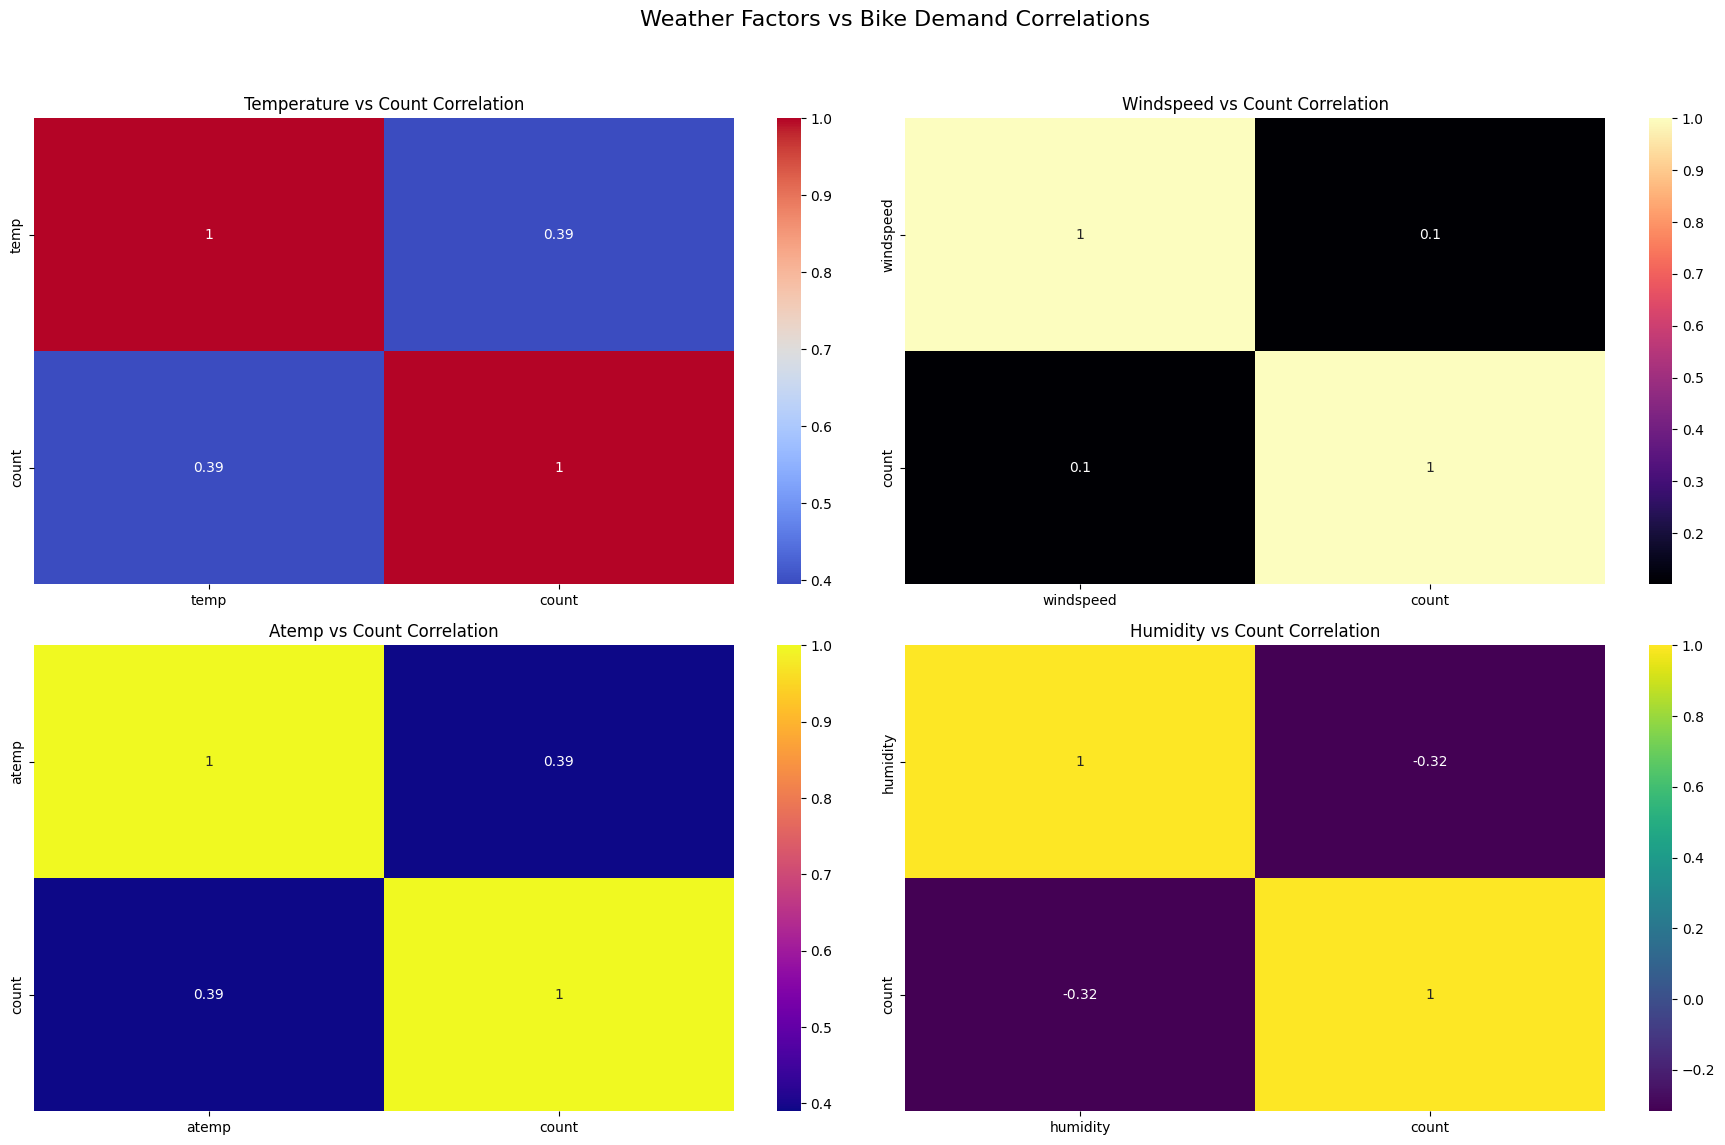

In [136]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))  # Create a 2x2 grid of subplots

sns.heatmap(df_yulu[['temp','count']].corr(), annot=True, cmap='coolwarm', ax=axs[0, 0])
sns.heatmap(df_yulu[['windspeed','count']].corr(), annot=True, cmap='magma', ax=axs[0, 1])
sns.heatmap(df_yulu[['atemp','count']].corr(), annot=True, cmap='plasma', ax=axs[1, 0])
sns.heatmap(df_yulu[['humidity','count']].corr(), annot=True, cmap='viridis', ax=axs[1, 1]) # Using a different cmap for clarity

axs[0, 0].set_title('Temperature vs Count Correlation')
axs[0, 1].set_title('Windspeed vs Count Correlation')
axs[1, 0].set_title('Atemp vs Count Correlation')
axs[1, 1].set_title('Humidity vs Count Correlation')


fig.suptitle('Weather Factors vs Bike Demand Correlations', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**The above map does not show a strong correaltion between Weather demands and bike rentals. Hence, temp, atemp, humidity, windspeed does not affect bike rentals.**

# **3. Number of Bike rides on weekdays and weekends.**

In [137]:
bike_weekend =df_yulu[(df_yulu['workingday']==0) & (df_yulu['holiday']==0)] [['count','date']]
bike_weekend= bike_weekend.groupby(by='date').sum()
bike_weekend_list= bike_weekend['count'].to_list()

In [138]:
bike_weekdays =df_yulu[df_yulu['workingday']==1][['holiday','date','count']]
bike_weekdays= bike_weekdays.groupby(by='date').sum()
bike_weekdays_list= bike_weekdays['count'].to_list()

# **Performing the 2 sample T-test for weekend and weekday bike rides.**

**H0: There is no statistically significant difference in the number of bike rides between weekdays and weekends.**

**Ha: There is a statistically significant difference in the number of bike rides between weekdays and weekends.**

In [139]:
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp
t_stat, pvalue = ttest_ind(bike_weekend_list, bike_weekdays_list)
print(t_stat, pvalue)

alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

-0.39575743552286574 0.692475366809191
Fail to Reject H0


**From the above data, we fail to reject the null hypothesis. Hence, There is no statistically significant difference in the number of bike rides between weekdays and weekends.**

#**Inference and Conclusion:**

# **Demand of Bicycles on rent is for different weather conditions.**

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [140]:
bike_weather1= df_yulu[df_yulu['weather']== 1]['count']
bike_weather1 = bike_weather1.to_list()

bike_weather2= df_yulu[df_yulu['weather']== 2]['count']
bike_weather2 = bike_weather2.to_list()

bike_weather3= df_yulu[df_yulu['weather']== 3]['count']
bike_weather3 = bike_weather3.to_list()

bike_weather4= df_yulu[df_yulu['weather']== 4]['count']
bike_weather4 = bike_weather4.to_list()


# **Performing ANOVA Test for Bike Rentals vs Weather Conditions**

# **Null Hypothesis (H₀):**
**"Mean bike rentals are equal across all weather conditions."**
(b1 = b2 = b3 = b4)

# **Alternative Hypothesis (H₁):**
**"At least one weather condition has a different mean bike rental count.**

# **Checking for Normality**

# **HISTPLOT for each weather conditions**

# **QQ PLOT to test Normality.**

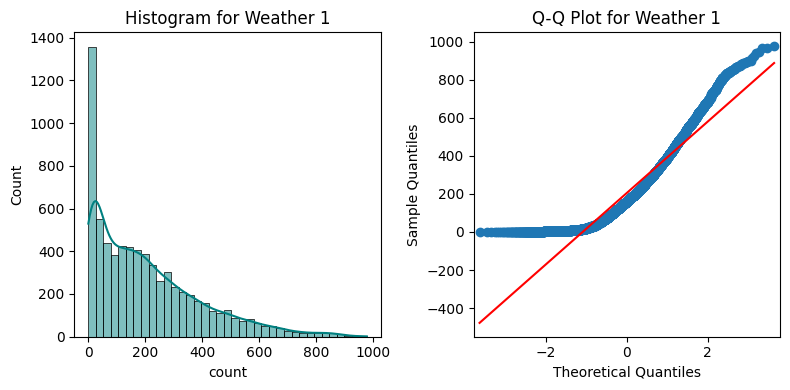

Weather 1 - Skewness: 1.14, Kurtosis: 0.96
Shapiro-Wilk Test: p-value = 0.0000 → Not Normal or Gaussian



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7192.
  res = hypotest_fun_out(*samples, **kwds)


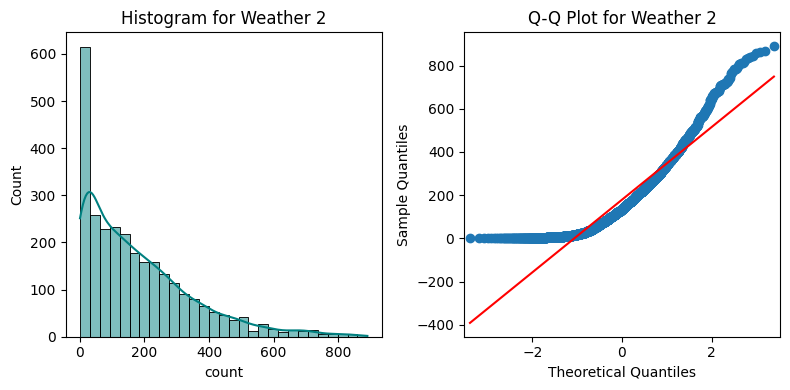

Weather 2 - Skewness: 1.29, Kurtosis: 1.58
Shapiro-Wilk Test: p-value = 0.0000 → Not Normal or Gaussian



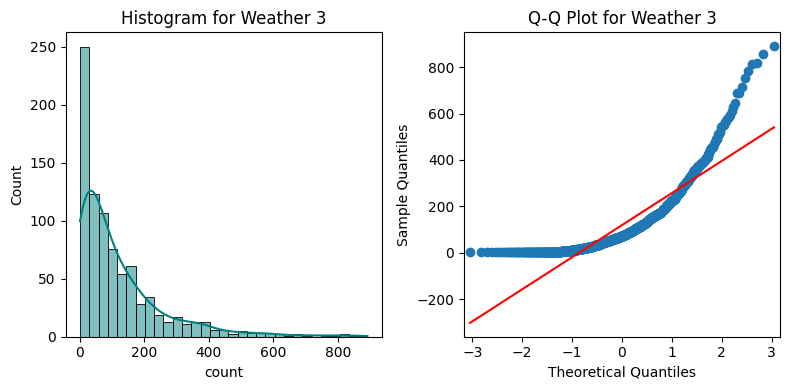

Weather 3 - Skewness: 2.18, Kurtosis: 5.96
Shapiro-Wilk Test: p-value = 0.0000 → Not Normal or Gaussian



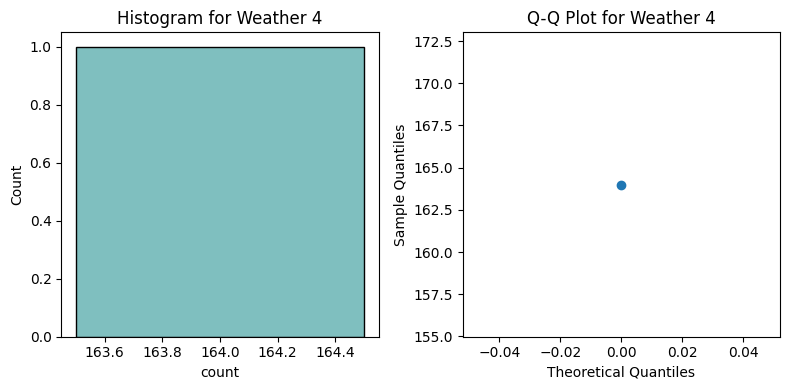

Weather 4 - Skewness: nan, Kurtosis: nan
Shapiro-Wilk Test: p-value = nan → Not Normal or Gaussian



/tmp/ipython-input-141-476418775.py:21: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = shapiro(group_data)


In [141]:
import seaborn as sns
from scipy import stats
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro, levene, kurtosis, skew

weather_groups = df_yulu.groupby('weather')['count']
for label, group_data in weather_groups:
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.histplot(group_data, color= 'teal', kde=True)
    plt.title(f"Histogram for Weather {label}")

    plt.subplot(1,2,2)
    sm.qqplot(df_yulu[df_yulu['weather']== label]['count'], line="s",ax= plt.gca())
    plt.title(f"Q-Q Plot for Weather {label}")
    plt.tight_layout()
    plt.show()
    print(f"Weather {label} - Skewness: {skew(group_data):.2f}, Kurtosis: {kurtosis(group_data):.2f}")
    stat, p = shapiro(group_data)
    print(f"Shapiro-Wilk Test: p-value = {p:.4f} → {'Normal or Gaussian' if p > 0.05 else 'Not Normal or Gaussian'}\n")


Histogram for weather 1,2,3 shows high skewness and long tails which tells unpredictable demand under that condition. Most bike rentals are clustered at lower values, with a few unusually high-rental days pulling the mean up.

Whereas, there is less demand for bike in weather condition 4.

Weather 3 has high kurtosis (5.96) which indicates there are extreme outliers.

The data fails for normality assumption for ANOVA.

# **LEVENE TEST for Bike Rentals Vs Weather Conditions.**

In [142]:
grouped_data = [group for _, group in weather_groups]
levene_stat, levene_p = levene(*grouped_data)
print(f"Levene’s Test p-value = {levene_p:.4f} → {'Equal variance' if levene_p > 0.05 else 'Unequal variance'}\n")

Levene’s Test p-value = 0.0000 → Unequal variance



# **ANOVA TEST**

In [143]:
from scipy.stats import f_oneway
f_stats, p_value = f_oneway(bike_weather1, bike_weather2, bike_weather3, bike_weather4)

print("test statistic:",f_stats)
print("p_value:",p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Atleast one group have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

test statistic: 65.53024112793271
p_value: 5.482069475935669e-42
Reject H0
Atleast one group have different mean


**Hence, we have rejected the null hypothesis and we can conclude Bike rental demand significantly varies across weather conditions.**

# **Tests for Bike Rentals vs Season**

In [144]:
bike_season1= df_yulu[df_yulu['season']== 1]['count']
bike_season1 = bike_season1.to_list()

bike_season2= df_yulu[df_yulu['season']== 2]['count']
bike_season2 = bike_season2.to_list()

bike_season3= df_yulu[df_yulu['season']== 3]['count']
bike_season3 = bike_season3.to_list()

bike_season4= df_yulu[df_yulu['season']== 4]['count']
bike_season4 = bike_season4.to_list()

# **Null Hypothesis (H₀):**
**"Mean bike rentals are equal across all seasons."**
(s1 = s2 = s3 = s4)

# **Alternative Hypothesis (H₁):**
**"At least one season has a different mean bike rental count.**

# **Checking for Normality**

# **HISTPLOT for each weather conditions**

# **QQ PLOT to test Normality.**

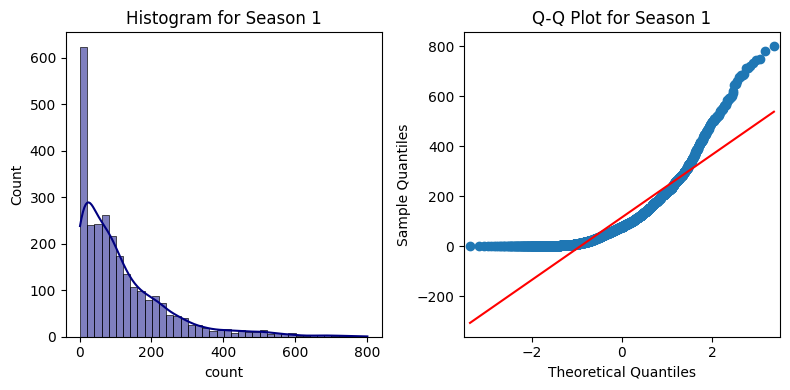

Weather 1 - Skewness: 1.89, Kurtosis: 4.30
Shapiro-Wilk Test: p-value = 0.0000 → Not Normal or Gaussian



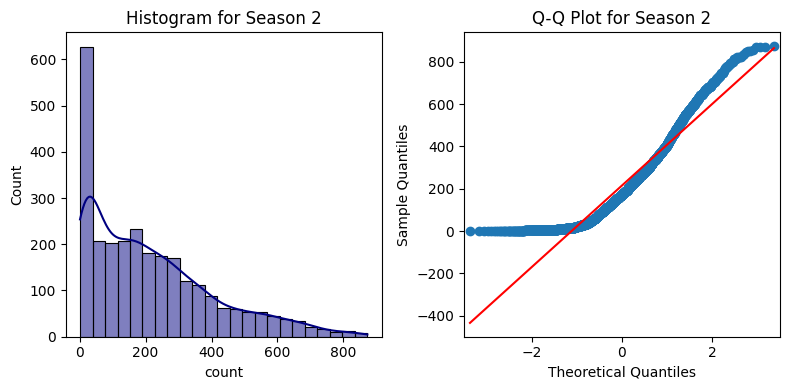

Weather 2 - Skewness: 1.00, Kurtosis: 0.42
Shapiro-Wilk Test: p-value = 0.0000 → Not Normal or Gaussian



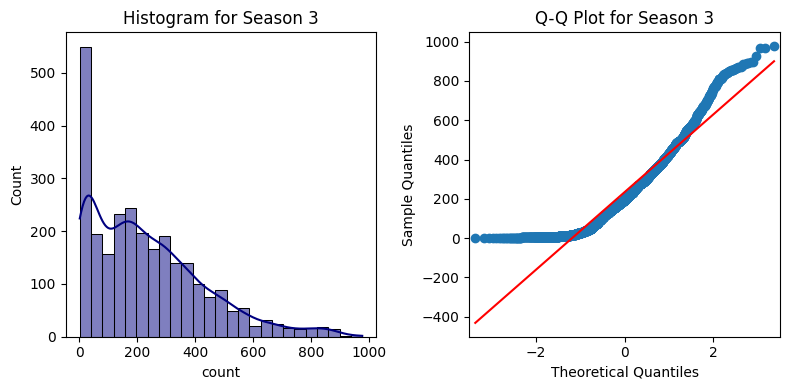

Weather 3 - Skewness: 0.99, Kurtosis: 0.70
Shapiro-Wilk Test: p-value = 0.0000 → Not Normal or Gaussian



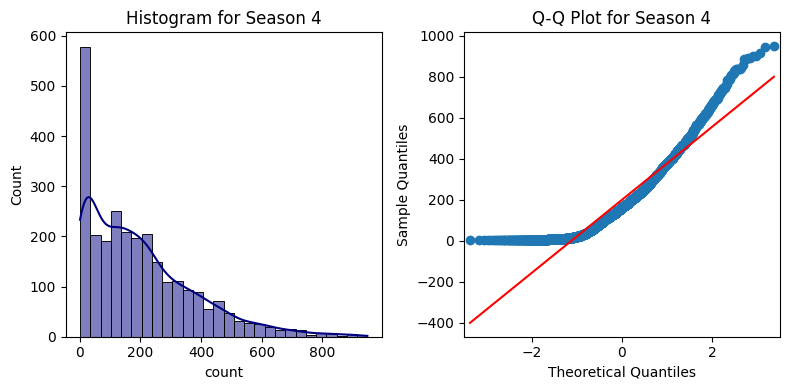

Weather 4 - Skewness: 1.17, Kurtosis: 1.27
Shapiro-Wilk Test: p-value = 0.0000 → Not Normal or Gaussian



In [145]:
season_groups = df_yulu.groupby('season')['count']
for label, group_data in season_groups:
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.histplot(group_data, color= 'navy', kde=True)
    plt.title(f"Histogram for Season {label}")

    plt.subplot(1,2,2)
    sm.qqplot(df_yulu[df_yulu['season']== label]['count'], line="s",ax= plt.gca())
    plt.title(f"Q-Q Plot for Season {label}")
    plt.tight_layout()
    plt.show()
    print(f"Weather {label} - Skewness: {skew(group_data):.2f}, Kurtosis: {kurtosis(group_data):.2f}")
    stat, p = shapiro(group_data)
    print(f"Shapiro-Wilk Test: p-value = {p:.4f} → {'Normal or Gaussian' if p > 0.05 else 'Not Normal or Gaussian'}\n")


In [146]:
grouped_data = [group for _, group in season_groups]
levene_stat, levene_p = levene(*grouped_data)
print(f"Levene’s Test p-value = {levene_p:.4f} → {'Equal variance' if levene_p > 0.05 else 'Unequal variance'}\n")

Levene’s Test p-value = 0.0000 → Unequal variance



# **ANOVA TEST**

In [147]:
from scipy.stats import f_oneway
f_stats, p_value = f_oneway(bike_season1, bike_season2, bike_season3, bike_season4)

print("test statistic:",f_stats)
print("p_value:",p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Atleast one group have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

test statistic: 236.94671081032106
p_value: 6.164843386499654e-149
Reject H0
Atleast one group have different mean


# **Weather Condition Vs Different Season.**

In [148]:
pd.crosstab(index= df_yulu['season'], columns= df_yulu['weather'], margins= True)

weather,1,2,3,4,All
season,,,,,
1,1759,715,211,1,2686
2,1801,708,224,0,2733
3,1930,604,199,0,2733
4,1702,807,225,0,2734
All,7192,2834,859,1,10886


# **Chi-square Test for Independence**
**H0: Seasons and Weather are dependent.**

**H1: Seasons and Weather are not dependent.**

In [149]:
from scipy.stats import chi2_contingency
observed = pd.crosstab(index= df_yulu['season'], columns= df_yulu['weather'], margins= True)

chi_stat, p_value, df, exp_freq = chi2_contingency(observed) # chi_stat, p_value, df, expected values
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",df)
print("exp_freq:",exp_freq)

chi_stat: 49.15865559689363
p_value: 3.1185273325126814e-05
df: 16
exp_freq: [[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01
  2.68600000e+03]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01
  2.73300000e+03]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01
  2.73300000e+03]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01
  2.73400000e+03]
 [7.19200000e+03 2.83400000e+03 8.59000000e+02 1.00000000e+00
  1.08860000e+04]]


In [150]:
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Seasons and Weather are dependent")
else:
    print("Fail to reject H0")
    print("Season and Weather are independent")

Reject H0
Seasons and Weather are dependent


**From the above test, we can conclude:**

**There is strong evidence (p < 0.0003) that season and weather are not independent. They have a statistically significant relationship.**

**The data deviates significantly from what would be expected if the variables were unrelated.**

**Hence, Season 3 (Fall) and Weather 1 (Clear, Few clouds, partly cloudy) greatly influence bike rental. after that, Season 2 (Summer) and Weather 1 (Clear, Few clouds, partly cloudy) favours bike rides.**

**However, there is less use of bikes when the weather is 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)**

# **Actions and Recommendations**
### **10 Actionable Recommendations to Increase Yulu Bike Rentals**  

1. **Boost Marketing in Peak Months**  
   - Run special promotions in **May–August** and **November–December** when demand is highest.  
   - Offer discounts for **group rides** or **weekend packages** during these months.  

2. **Improve Bike Availability in High-Demand Seasons**  
   - Increase the number of bikes in **Summer (Season 2)** and **Fall (Season 3)** when rentals peak.  
   - Focus on areas with **Clear/Partly Cloudy Weather (Weather 1)**, as it attracts the most riders.  

3. **Target Casual Users with Flexible Plans**  
   - Introduce **hourly or weekend passes** for casual users, who show high usage in peak months.  
   - Partner with **tourist spots** to promote bike rentals.  

4. **Address Low-Demand Periods (Jan–Mar)**  
   - Offer **winter ride incentives**.  
   - Promote indoor events or challenges to keep engagement high.  

5. **Weather-Based Dynamic Pricing**  
   - Lower prices slightly during **Light Rain/Snow (Weather 3)** to encourage rides.  
   - Surge pricing during **perfect weather (Clear/Sunny)** to maximize revenue.  

6. **Enhance Safety for Bad Weather Rides**  
   - Provide **rain gear attachments** or discounts for rainy-day rides.  
   - Highlight **covered parking spots** to reduce weather-related cancellations.  

7. **Leverage Data on Outliers**  
   - Investigate **extreme high-rental days** (outliers) to replicate successful conditions (e.g., festivals, events).  
   - Partner with event organizers to offer **bike rentals during city marathons or parades**.  

8. **Improve Visibility in Low-Usage Weather**  
   - Run ads emphasizing **comfortable riding temps** (e.g., "Not too hot, not too cold—perfect for Yulu!").  
   - Offer **free first rides** during slow seasons to attract new users.